<a href="https://colab.research.google.com/github/MadmanMarble/MadmanMarble/blob/main/Image_processing_landsat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
install.packages('gdalutils')
install.packages('sf')
install.packages('raster')
install.packages('exactextractr')
install.packages("googledrive")
install.packages("googletoken")
install.packages("DBI")
install.packages("RSQLite")
install.packages("RPostgreSQL")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘gdalutils’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘proxy’, ‘e1071’, ‘wk’, ‘classInt’, ‘Rcpp’, ‘s2’, ‘units’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘sp’, ‘terra’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘googletoken’ is not available for this version of R

A version of this packag

# New Section

In [2]:
library(ggplot2)
library(sf)
library(magrittr)
library(data.table)
library(raster)
library(exactextractr)
library(googledrive)
library(DBI)
library(zip)

Linking to GEOS 3.11.1, GDAL 3.6.4, PROJ 9.1.1; sf_use_s2() is TRUE

Loading required package: sp


Attaching package: ‘zip’


The following objects are masked from ‘package:utils’:

    unzip, zip




In [5]:
drive_auth(use_oob = TRUE, cache = FALSE)

Please point your browser to the following url: 

https://accounts.google.com/o/oauth2/v2/auth?client_id=603366585132-frjlouoa3s2ono25d2l9ukvhlsrlnr7k.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&redirect_uri=https%3A%2F%2Fwww.tidyverse.org%2Fgoogle-callback%2F&response_type=code&state=b0fcd42ca021db7fcec0ad8deb2ec535&access_type=offline&prompt=consent



Enter authorization code: eyJjb2RlIjoiNC8wQWZKb2hYblhjZFhuMnQ1elgyWlVVSWY4Sm1CWnF5QjhMUnJmSFlDdGZKc3ZRVFZVQUVheHVmakxZMWdLN1NEU0hlc2FpUSIsInN0YXRlIjoiYjBmY2Q0MmNhMDIxZGI3ZmNlYzBhZDhkZWIyZWM1MzUifQ==


In [250]:
dir.create('/content/waipio2018/')

In [251]:
# kahuku
# CCAP: https://drive.google.com/file/d//view?usp=drive_link
drive_download(file = as_id('1wvtHlIlzIT-rzXKS4gohsTgd63T-Z0EI'), path =  '/content/waipio2018/waipio2018_ccap.tif', overwrite = TRUE)

File downloaded:

• waipio.tif <id: 1wvtHlIlzIT-rzXKS4gohsTgd63T-Z0EI>

Saved locally as:

• /content/waipio2018/waipio2018_ccap.tif



In [252]:
# Planet Labs:
drive_download(file = as_id('1YL8DwgkdxH5kdbw6aVBh3OE34yl3rQsa'), path =  '/content/waipio2018/01.tif', overwrite = TRUE)
drive_download(file = as_id('1QLPXlLysVX9GWfRxg9mNBsnhcgXIY2Wk'), path =  '/content/waipio2018/02.tif', overwrite = TRUE)
drive_download(file = as_id('1VnD42ldpBzk6yUIXEGK5Wz0ckYH4zdug'), path =  '/content/waipio2018/03.tif', overwrite = TRUE)
# drive_download(file = as_id(''), path =  '/content/waipio2018/04.tif', overwrite = TRUE)

# https://drive.google.com/open?id=&usp=drive_copy
# https://drive.google.com/open?id=&usp=drive_copy
# https://drive.google.com/open?id=&usp=drive_copy

File downloaded:

• waipio2018_01.tif <id: 1YL8DwgkdxH5kdbw6aVBh3OE34yl3rQsa>

Saved locally as:

• /content/waipio2018/01.tif

File downloaded:

• waipio2018_02.tif <id: 1QLPXlLysVX9GWfRxg9mNBsnhcgXIY2Wk>

Saved locally as:

• /content/waipio2018/02.tif

File downloaded:

• waipio2018_03.tif <id: 1VnD42ldpBzk6yUIXEGK5Wz0ckYH4zdug>

Saved locally as:

• /content/waipio2018/03.tif



In [253]:
planet_raster <-stack(
  '/content/waipio2018/01.tif',
'/content/waipio2018/02.tif',
'/content/waipio2018/03.tif')
# '/content/waipio2018/04.tif')

In [254]:
ccap_raster <- stack('/content/waipio2018/waipio2018_ccap.tif')

In [255]:
planet_raster_extended <- extend(planet_raster, projectExtent(ccap_raster, planet_raster), value=NA)

In [256]:
ccap_raster
planet_raster

class      : RasterStack 
dimensions : 1942, 1247, 2421674, 1  (nrow, ncol, ncell, nlayers)
resolution : 2.4, 2.4  (x, y)
extent     : 226466.3, 229459.1, 2223094, 2227755  (xmin, xmax, ymin, ymax)
crs        : +proj=utm +zone=5 +datum=WGS84 +units=m +no_defs 
names      : Layer_1 


class      : RasterStack 
dimensions : 156, 105, 16380, 21  (nrow, ncol, ncell, nlayers)
resolution : 0.0002694946, 0.0002694946  (x, y)
extent     : -155.6159, -155.5876, 20.0857, 20.12774  (xmin, xmax, ymin, ymax)
crs        : +proj=longlat +datum=WGS84 +no_defs 
names      : Blue.1, Blue.2, Blue.3, Blue.4, Blue.5, Blue.6, Blue.7, Blue.8, Blue.9, Blue.10, Blue.11, Blue.12, Blue.13, Blue.14, Blue.15, ... 


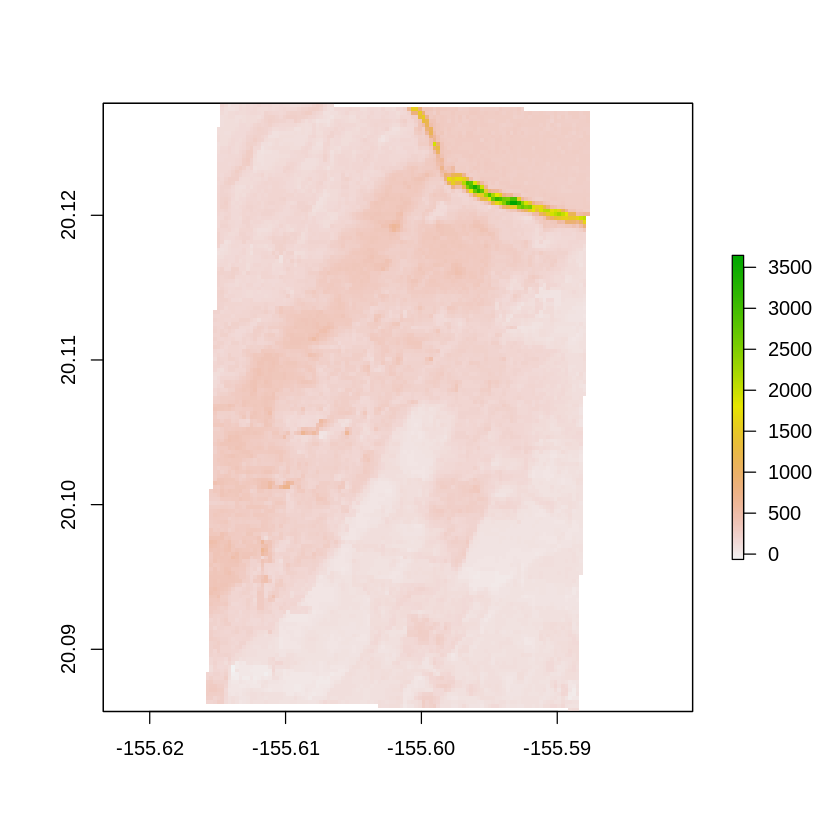

In [257]:
planet_raster [[1]]%>% plot

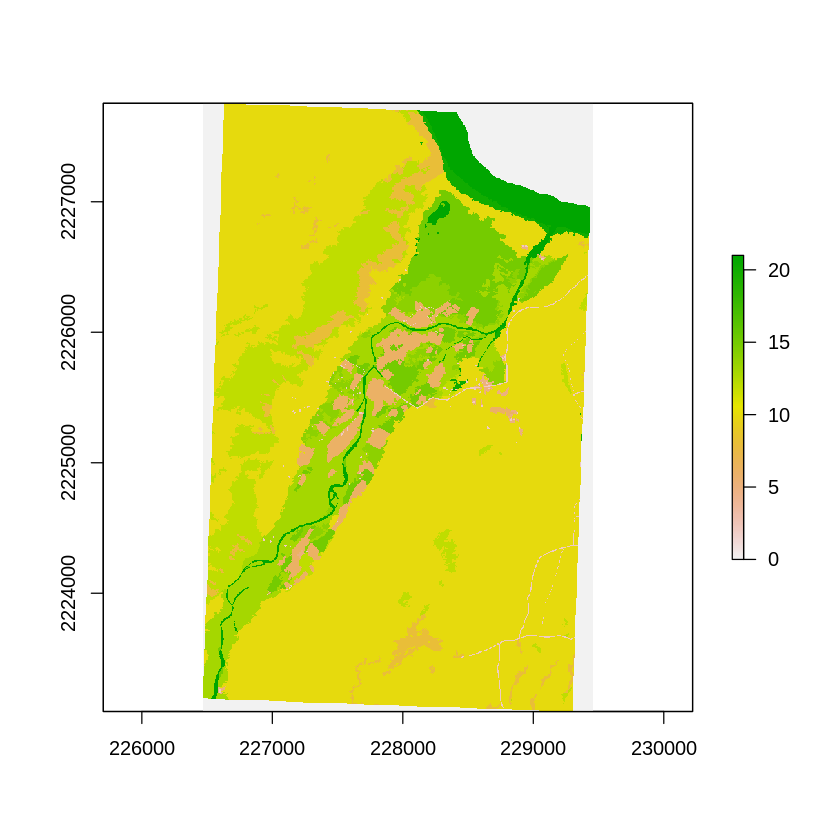

In [258]:
ccap_raster %>% plot

In [259]:
ncol(ccap_raster)

nrow(ccap_raster)


y_end <- c(seq(1,ccap_raster %>% nrow,512),nrow(ccap_raster))[-1]
x_end <- c(seq(1,ccap_raster %>% ncol,512),ncol(ccap_raster))[-1]

extract_grid <- expand.grid(x_end,y_end) %>% data.table

names(extract_grid) <- c('x_end','y_end')

extract_grid$x_org <- extract_grid$x_end - 512
extract_grid$y_org <- extract_grid$y_end - 512

extract_grid$id <- 1:nrow(extract_grid)

[1] 1247

[1] 1942

In [260]:
# dir.create('/TrainingData/Niihau')
# Specify the path for the new folder/directory
new_folder_path <- "/content/waipio2018/Images"
new_folder_path2 <- "/content/waipio2018/Labels"
# Use dir.create to create the new folder
dir.create(new_folder_path, showWarnings = FALSE)

# Check if the folder was created successfully
if (file.exists(new_folder_path)) {
  cat("Folder created:", new_folder_path, "\n")
} else {
  cat("Failed to create folder:", new_folder_path, "\n")
}


# Use dir.create to create the new folder
dir.create(new_folder_path2, showWarnings = FALSE)
# Check if the folder was created successfully
if (file.exists(new_folder_path2)) {
  cat("Folder created:", new_folder_path2, "\n")
} else {
  cat("Failed to create folder:", new_folder_path2, "\n")
}

Folder created: /content/waipio2018/Images 
Folder created: /content/waipio2018/Labels 


In [261]:
result_dt <-
1:nrow(extract_grid) %>% lapply(function(x){

  nrow <- 0
  ncol <- 0
  i <- 0
  while(nrow !=512 | ncol != 512){
    i <- i + 1
    # Calculate the geographic coordinates for the cropping extent
    xmin <- xFromCol(ccap_raster, extract_grid[x,]$x_org) + rnorm(1)*.01*2.4
    xmax <- xFromCol(ccap_raster, extract_grid[x,]$x_end) + rnorm(1)*.01*2.4
    ymin <- yFromRow(ccap_raster, extract_grid[x,]$y_end) + rnorm(1)*.01*2.4 # Note row_max as raster origin is top-left
    ymax <- yFromRow(ccap_raster, extract_grid[x,]$y_org) + rnorm(1)*.01*2.4 # Note row_min as raster origin is top-left

    e <- extent(xmin, xmax, ymin, ymax)

    ccap_cropped_raster <- crop(ccap_raster, e)

    nrow <- nrow(ccap_cropped_raster)
    ncol <- ncol(ccap_cropped_raster)


    # print(dim(ccap_cropped_raster))
    if(i>1000){return('failed to converge')}
    }

  ls_cropped_raster <- crop(planet_raster_extended, projectExtent(ccap_cropped_raster,planet_raster))

  ls_resampled_raster <- projectRaster(ls_cropped_raster,ccap_cropped_raster)
  print(ls_resampled_raster)
  pixel_table <- (table(values(ccap_cropped_raster))/ncell(ccap_cropped_raster)) %>% data.table

  names(pixel_table) <- c('label','percent')

  out_dt <- data.table(extract_grid[x,],xmin = xmin,xmax =xmax,ymin= ymin,ymax, pixel_table)

  if(ls_resampled_raster %>% nrow ==512 & ls_resampled_raster %>% ncol ==512 & ccap_cropped_raster%>% nrow ==512 & ccap_cropped_raster%>% ncol ==512){
    ls_resampled_raster %>%
    writeRaster(., paste("/content/waipio2018/Images/",extract_grid[x,]$x_org,'_',extract_grid[x,]$y_org,'.tif',sep=''),overwrite=T)

    ccap_cropped_raster %>%
    writeRaster(., paste("/content/waipio2018/Labels/",extract_grid[x,]$x_org,'_',extract_grid[x,]$y_org,'.tif',sep=''),overwrite=T)
  }else(print('uh oh'))

  return(out_dt)
})
result_dt[ result_dt %>% lapply(function(x){is.data.table(x)}) %>% unlist] %>% rbindlist %>%
fwrite("/content/waipio2018/waipio2018.csv")


class      : RasterBrick 
dimensions : 512, 512, 262144, 21  (nrow, ncol, ncell, nlayers)
resolution : 2.4, 2.4  (x, y)
extent     : 226466.3, 227695.1, 2226523, 2227752  (xmin, xmax, ymin, ymax)
crs        : +proj=utm +zone=5 +datum=WGS84 +units=m +no_defs 
source     : memory
names      :     Blue.1,     Blue.2,     Blue.3,     Blue.4,     Blue.5,     Blue.6,     Blue.7,     Blue.8,     Blue.9,    Blue.10,    Blue.11,    Blue.12,    Blue.13,    Blue.14,    Blue.15, ... 
min values :   60.74300,  107.72674,   60.01729,  926.78097,  279.48214,   95.14716,  223.53131,   91.71397,  176.62554,   78.45554, 2283.30520,  650.73561,  233.69707,  223.53131,   63.32118, ... 
max values :   336.3590,   710.4351,   543.3946,  4972.4869,  2133.9300,   933.3074,   548.1155,   340.1285,   721.6266,   429.3125,  5168.1433,  2017.1935,   852.6651,   548.1155,   297.8575, ... 

class      : RasterBrick 
dimensions : 512, 512, 262144, 21  (nrow, ncol, ncell, nlayers)
resolution : 2.4, 2.4  (x, y)
extent

In [262]:
zip(zipfile = "/content/waipio2018.zip",
    files = c("/content/waipio2018/Images",
              "/content/waipio2018/Labels",
              "/content/waipio2018/waipio2018.csv"))

Warning message in fix_absolute_paths(data$key):
“Dropping leading `/` from paths, all paths in a zip file must be relative paths.”


In [263]:
# save to processed_data https://drive.google.com/drive/folders/16L0tZprsxCXcltp-UgkuISTL3rvX8KAV?usp=drive_link
drive_upload(media = "/content/waipio2018.zip", path = as_id("16L0tZprsxCXcltp-UgkuISTL3rvX8KAV"))

Local file:

• /content/waipio2018.zip

Uploaded into Drive file:

• waipio2018.zip <id: 1ONCUgbqtrMm0680n-wqcmkZZZ8ZUvy2J>

With MIME type:

• application/zip



### 2019 Cell

In [264]:
dir.create('/content/waipio2019/')

In [265]:
# Planet Labs:
drive_download(file = as_id('15jOaWgMeH3xjwdM5bMtSvKcU48xqbn7y'), path =  '/content/waipio2019/01.tif', overwrite = TRUE)
drive_download(file = as_id('1MMw6Udh3wevnVeCZqpyhvY-t-9HTiTIB'), path =  '/content/waipio2019/02.tif', overwrite = TRUE)
# drive_download(file = as_id('1YKNzKBM2_hHtMfOT1huWPcaTFj7RNQ6O'), path =  '/content/waihee2019/03.tif', overwrite = TRUE)
# drive_download(file = as_id('1RSkJIjx6Owne9ccMP5c4mySRcNPQ1oF7'), path =  '/content/waihee2019/04.tif', overwrite = TRUE)

# https://drive.google.com/open?id=&usp=drive_copy
# https://drive.google.com/open?id=&usp=drive_copy

File downloaded:

• waipio2019_01.tif <id: 15jOaWgMeH3xjwdM5bMtSvKcU48xqbn7y>

Saved locally as:

• /content/waipio2019/01.tif

File downloaded:

• waipio2019_02.tif <id: 1MMw6Udh3wevnVeCZqpyhvY-t-9HTiTIB>

Saved locally as:

• /content/waipio2019/02.tif



In [266]:
planet_raster <-stack(
  '/content/waipio2019/01.tif',
'/content/waipio2019/02.tif')
# '/content/waihee2019/03.tif',
# '/content/waihee2019/04.tif')

In [267]:
planet_raster_extended <- extend(planet_raster, projectExtent(ccap_raster, planet_raster), value=NA)

In [268]:
ccap_raster
planet_raster

class      : RasterStack 
dimensions : 1942, 1247, 2421674, 1  (nrow, ncol, ncell, nlayers)
resolution : 2.4, 2.4  (x, y)
extent     : 226466.3, 229459.1, 2223094, 2227755  (xmin, xmax, ymin, ymax)
crs        : +proj=utm +zone=5 +datum=WGS84 +units=m +no_defs 
names      : Layer_1 


class      : RasterStack 
dimensions : 156, 105, 16380, 14  (nrow, ncol, ncell, nlayers)
resolution : 0.0002694946, 0.0002694946  (x, y)
extent     : -155.6159, -155.5876, 20.0857, 20.12774  (xmin, xmax, ymin, ymax)
crs        : +proj=longlat +datum=WGS84 +no_defs 
names      : Blue.1, Blue.2, Blue.3, Blue.4, Blue.5, Blue.6, Blue.7, Blue.8, Blue.9, Blue.10, Blue.11, Blue.12, Blue.13, Blue.14 


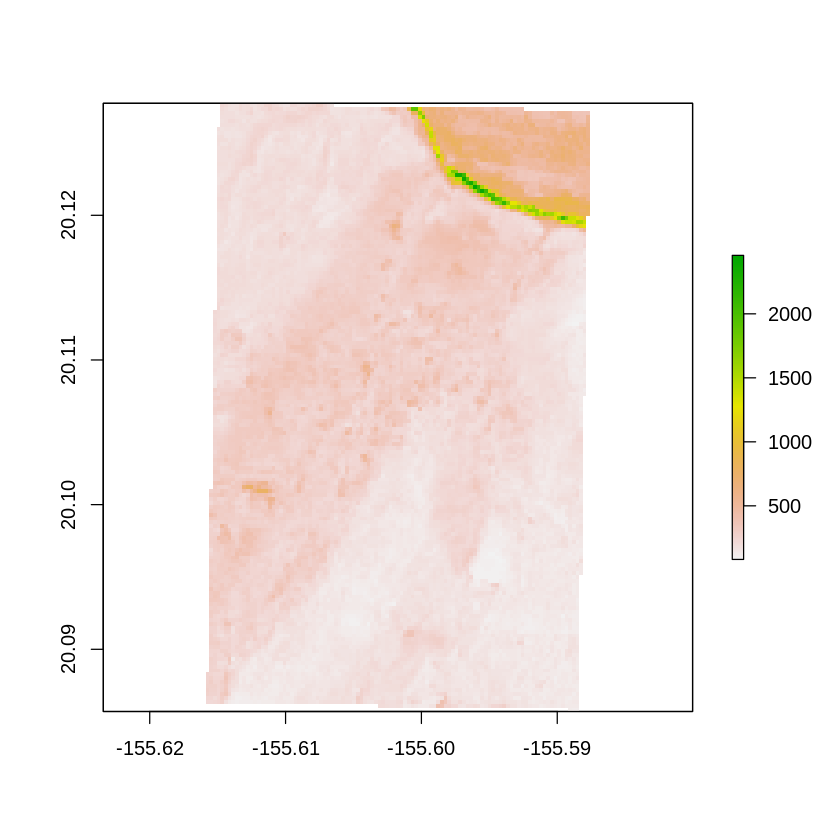

In [269]:
planet_raster [[1]]%>% plot

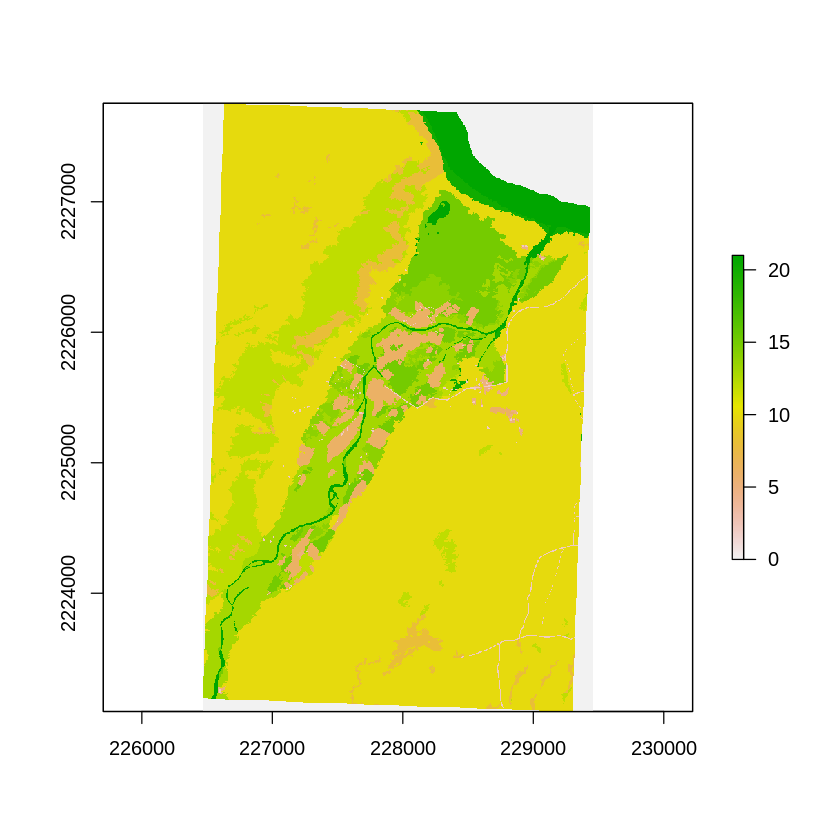

In [270]:
ccap_raster %>% plot

In [271]:
ncol(ccap_raster)

nrow(ccap_raster)


y_end <- c(seq(1,ccap_raster %>% nrow,512),nrow(ccap_raster))[-1]
x_end <- c(seq(1,ccap_raster %>% ncol,512),ncol(ccap_raster))[-1]

extract_grid <- expand.grid(x_end,y_end) %>% data.table

names(extract_grid) <- c('x_end','y_end')

extract_grid$x_org <- extract_grid$x_end - 512
extract_grid$y_org <- extract_grid$y_end - 512

extract_grid$id <- 1:nrow(extract_grid)

[1] 1247

[1] 1942

In [272]:
# dir.create('/TrainingData/Niihau')
# Specify the path for the new folder/directory
new_folder_path <- "/content/waipio2019/Images"
new_folder_path2 <- "/content/waipio2019/Labels"
# Use dir.create to create the new folder
dir.create(new_folder_path, showWarnings = FALSE)

# Check if the folder was created successfully
if (file.exists(new_folder_path)) {
  cat("Folder created:", new_folder_path, "\n")
} else {
  cat("Failed to create folder:", new_folder_path, "\n")
}


# Use dir.create to create the new folder
dir.create(new_folder_path2, showWarnings = FALSE)
# Check if the folder was created successfully
if (file.exists(new_folder_path2)) {
  cat("Folder created:", new_folder_path2, "\n")
} else {
  cat("Failed to create folder:", new_folder_path2, "\n")
}

Folder created: /content/waipio2019/Images 
Folder created: /content/waipio2019/Labels 


In [273]:
result_dt <-
1:nrow(extract_grid) %>% lapply(function(x){

  nrow <- 0
  ncol <- 0
  i <- 0
  while(nrow !=512 | ncol != 512){
    i <- i + 1
    # Calculate the geographic coordinates for the cropping extent
    xmin <- xFromCol(ccap_raster, extract_grid[x,]$x_org) + rnorm(1)*.01*2.4
    xmax <- xFromCol(ccap_raster, extract_grid[x,]$x_end) + rnorm(1)*.01*2.4
    ymin <- yFromRow(ccap_raster, extract_grid[x,]$y_end) + rnorm(1)*.01*2.4 # Note row_max as raster origin is top-left
    ymax <- yFromRow(ccap_raster, extract_grid[x,]$y_org) + rnorm(1)*.01*2.4 # Note row_min as raster origin is top-left

    e <- extent(xmin, xmax, ymin, ymax)

    ccap_cropped_raster <- crop(ccap_raster, e)

    nrow <- nrow(ccap_cropped_raster)
    ncol <- ncol(ccap_cropped_raster)


    # print(dim(ccap_cropped_raster))
    if(i>1000){return('failed to converge')}
    }

  ls_cropped_raster <- crop(planet_raster_extended, projectExtent(ccap_cropped_raster,planet_raster))

  ls_resampled_raster <- projectRaster(ls_cropped_raster,ccap_cropped_raster)
  print(ls_resampled_raster)
  pixel_table <- (table(values(ccap_cropped_raster))/ncell(ccap_cropped_raster)) %>% data.table

  names(pixel_table) <- c('label','percent')

  out_dt <- data.table(extract_grid[x,],xmin = xmin,xmax =xmax,ymin= ymin,ymax, pixel_table)

  if(ls_resampled_raster %>% nrow ==512 & ls_resampled_raster %>% ncol ==512 & ccap_cropped_raster%>% nrow ==512 & ccap_cropped_raster%>% ncol ==512){
    ls_resampled_raster %>%
    writeRaster(., paste("/content/waipio2019/Images/",extract_grid[x,]$x_org,'_',extract_grid[x,]$y_org,'.tif',sep=''),overwrite=T)

    ccap_cropped_raster %>%
    writeRaster(., paste("/content/waipio2019/Labels/",extract_grid[x,]$x_org,'_',extract_grid[x,]$y_org,'.tif',sep=''),overwrite=T)
  }else(print('uh oh'))

  return(out_dt)
})
result_dt[ result_dt %>% lapply(function(x){is.data.table(x)}) %>% unlist] %>% rbindlist %>%
fwrite("/content/waipio2019/waipio2019.csv")


class      : RasterBrick 
dimensions : 512, 512, 262144, 14  (nrow, ncol, ncell, nlayers)
resolution : 2.4, 2.4  (x, y)
extent     : 226466.3, 227695.1, 2226523, 2227752  (xmin, xmax, ymin, ymax)
crs        : +proj=utm +zone=5 +datum=WGS84 +units=m +no_defs 
source     : memory
names      :     Blue.1,     Blue.2,     Blue.3,     Blue.4,     Blue.5,     Blue.6,     Blue.7,     Blue.8,     Blue.9,    Blue.10,    Blue.11,    Blue.12,    Blue.13,    Blue.14 
min values :  124.83295,  246.34435,  163.42258, 2472.59603,  725.12563,  339.29346,  223.53131,   84.87830,  187.65933,   87.96841, 2033.55230,  645.35552,  228.85899,  223.53131 
max values :   307.9556,   712.9176,   463.9766,  5423.8226,  1993.6362,   899.6412,   548.1155,   293.4120,   723.5084,   456.9755,  5734.7463,  2262.5745,  1029.0048,   548.1155 

class      : RasterBrick 
dimensions : 512, 512, 262144, 14  (nrow, ncol, ncell, nlayers)
resolution : 2.4, 2.4  (x, y)
extent     : 227695.1, 228923.9, 2226526, 2227755  (xmin,

In [274]:
zip(zipfile = "/content/waipio2019.zip",
    files = c("/content/waipio2019/Images",
              "/content/waipio2019/Labels",
              "/content/waipio2019/waipio2019.csv"))

Warning message in fix_absolute_paths(data$key):
“Dropping leading `/` from paths, all paths in a zip file must be relative paths.”


In [275]:
# save to processed_data https://drive.google.com/drive/folders/?usp=drive_link
drive_upload(media = "/content/waipio2019.zip", path = as_id("16L0tZprsxCXcltp-UgkuISTL3rvX8KAV"))

Local file:

• /content/waipio2019.zip

Uploaded into Drive file:

• waipio2019.zip <id: 1zeEzOxMVrjzejs53EKmoK-cCPPtwRpu1>

With MIME type:

• application/zip



## 2020 Cell

In [276]:
dir.create('/content/waipio2020/')

In [277]:
# Planet Labs
drive_download(file = as_id('1M3YbhiTp5SAyA6wdIN0WJOOTXJ0YW6kx'), path =  '/content/waipio2020/01.tif', overwrite = TRUE)
drive_download(file = as_id('1H79RinBHRNE2CGeubpMLl0sBIyoWr9aL'), path =  '/content/waipio2020/02.tif', overwrite = TRUE)
# drive_download(file = as_id('1LzedXLqQKpKNrRuiHbVGX7uA3NpZqrPc'), path =  '/content/waihee2020/03.tif', overwrite = TRUE)
# drive_download(file = as_id('1mENXEvZUkpFO5xSk2zX9xJ5rQOWDHzvc'), path =  '/content/waihee2020/04.tif', overwrite = TRUE)

# https://drive.google.com/open?id=&usp=drive_copy
# https://drive.google.com/open?id=&usp=drive_copy

File downloaded:

• waipio2020_01.tif <id: 1M3YbhiTp5SAyA6wdIN0WJOOTXJ0YW6kx>

Saved locally as:

• /content/waipio2020/01.tif

File downloaded:

• waipio2020_02.tif <id: 1H79RinBHRNE2CGeubpMLl0sBIyoWr9aL>

Saved locally as:

• /content/waipio2020/02.tif



In [278]:
# planet <- stack ('/content/kaluaapuhi2020/09.tif')
# planet[[1]] %>% plot

In [279]:
planet_raster <-stack(
  '/content/waipio2020/01.tif',
'/content/waipio2020/02.tif')
# '/content/waihee2020/03.tif',
# '/content/waihee2020/04.tif')

In [280]:
planet_raster_extended <- extend(planet_raster, projectExtent(ccap_raster, planet_raster), value=NA)

In [281]:
ccap_raster
planet_raster

class      : RasterStack 
dimensions : 1942, 1247, 2421674, 1  (nrow, ncol, ncell, nlayers)
resolution : 2.4, 2.4  (x, y)
extent     : 226466.3, 229459.1, 2223094, 2227755  (xmin, xmax, ymin, ymax)
crs        : +proj=utm +zone=5 +datum=WGS84 +units=m +no_defs 
names      : Layer_1 


class      : RasterStack 
dimensions : 156, 105, 16380, 14  (nrow, ncol, ncell, nlayers)
resolution : 0.0002694946, 0.0002694946  (x, y)
extent     : -155.6159, -155.5876, 20.0857, 20.12774  (xmin, xmax, ymin, ymax)
crs        : +proj=longlat +datum=WGS84 +no_defs 
names      : Blue.1, Blue.2, Blue.3, Blue.4, Blue.5, Blue.6, Blue.7, Blue.8, Blue.9, Blue.10, Blue.11, Blue.12, Blue.13, Blue.14 


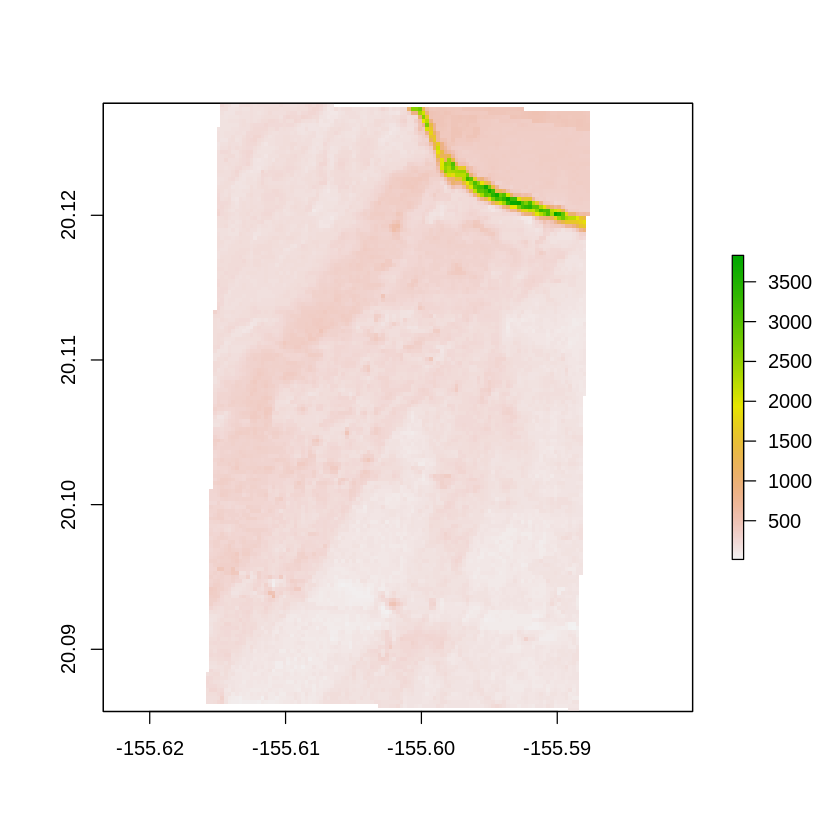

In [282]:
planet_raster [[1]]%>% plot

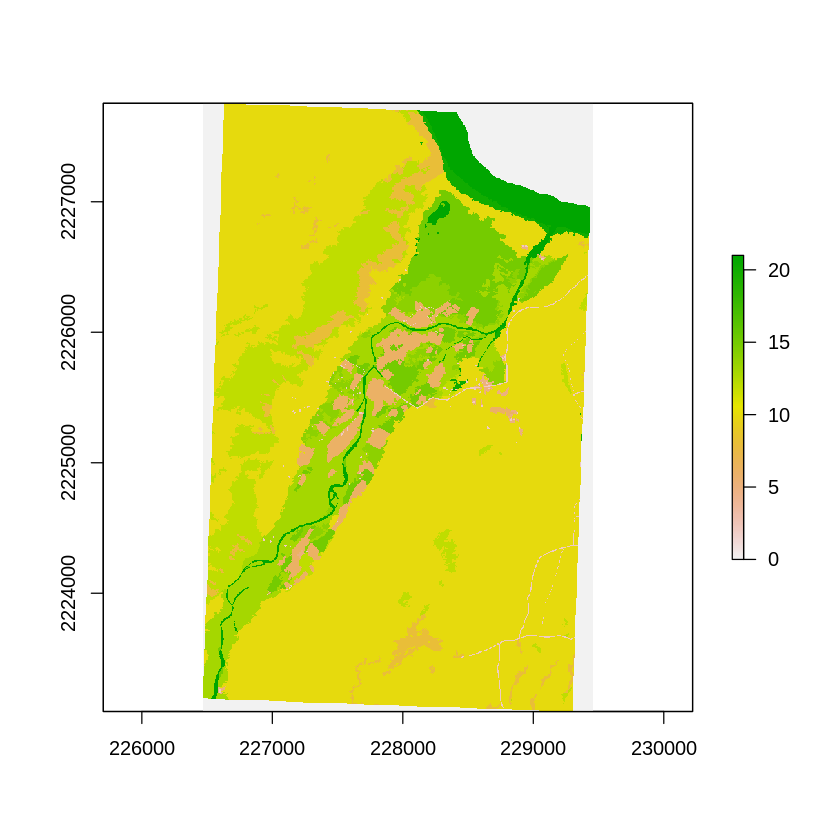

In [283]:
ccap_raster %>% plot

In [284]:
ncol(ccap_raster)

nrow(ccap_raster)


y_end <- c(seq(1,ccap_raster %>% nrow,512),nrow(ccap_raster))[-1]
x_end <- c(seq(1,ccap_raster %>% ncol,512),ncol(ccap_raster))[-1]

extract_grid <- expand.grid(x_end,y_end) %>% data.table

names(extract_grid) <- c('x_end','y_end')

extract_grid$x_org <- extract_grid$x_end - 512
extract_grid$y_org <- extract_grid$y_end - 512

extract_grid$id <- 1:nrow(extract_grid)

[1] 1247

[1] 1942

In [285]:
# dir.create('/TrainingData/Niihau')
# Specify the path for the new folder/directory
new_folder_path <- "/content/waipio2020/Images"
new_folder_path2 <- "/content/waipio2020/Labels"
# Use dir.create to create the new folder
dir.create(new_folder_path, showWarnings = FALSE)

# Check if the folder was created successfully
if (file.exists(new_folder_path)) {
  cat("Folder created:", new_folder_path, "\n")
} else {
  cat("Failed to create folder:", new_folder_path, "\n")
}


# Use dir.create to create the new folder
dir.create(new_folder_path2, showWarnings = FALSE)
# Check if the folder was created successfully
if (file.exists(new_folder_path2)) {
  cat("Folder created:", new_folder_path2, "\n")
} else {
  cat("Failed to create folder:", new_folder_path2, "\n")
}

Folder created: /content/waipio2020/Images 
Folder created: /content/waipio2020/Labels 


In [286]:
result_dt <-
1:nrow(extract_grid) %>% lapply(function(x){

  nrow <- 0
  ncol <- 0
  i <- 0
  while(nrow !=512 | ncol != 512){
    i <- i + 1
    # Calculate the geographic coordinates for the cropping extent
    xmin <- xFromCol(ccap_raster, extract_grid[x,]$x_org) + rnorm(1)*.01*2.4
    xmax <- xFromCol(ccap_raster, extract_grid[x,]$x_end) + rnorm(1)*.01*2.4
    ymin <- yFromRow(ccap_raster, extract_grid[x,]$y_end) + rnorm(1)*.01*2.4 # Note row_max as raster origin is top-left
    ymax <- yFromRow(ccap_raster, extract_grid[x,]$y_org) + rnorm(1)*.01*2.4 # Note row_min as raster origin is top-left

    e <- extent(xmin, xmax, ymin, ymax)

    ccap_cropped_raster <- crop(ccap_raster, e)

    nrow <- nrow(ccap_cropped_raster)
    ncol <- ncol(ccap_cropped_raster)


    # print(dim(ccap_cropped_raster))
    if(i>1000){return('failed to converge')}
    }

  ls_cropped_raster <- crop(planet_raster_extended, projectExtent(ccap_cropped_raster,planet_raster))

  ls_resampled_raster <- projectRaster(ls_cropped_raster,ccap_cropped_raster)
  print(ls_resampled_raster)
  pixel_table <- (table(values(ccap_cropped_raster))/ncell(ccap_cropped_raster)) %>% data.table

  names(pixel_table) <- c('label','percent')

  out_dt <- data.table(extract_grid[x,],xmin = xmin,xmax =xmax,ymin= ymin,ymax, pixel_table)

  if(ls_resampled_raster %>% nrow ==512 & ls_resampled_raster %>% ncol ==512 & ccap_cropped_raster%>% nrow ==512 & ccap_cropped_raster%>% ncol ==512){
    ls_resampled_raster %>%
    writeRaster(., paste("/content/waipio2020/Images/",extract_grid[x,]$x_org,'_',extract_grid[x,]$y_org,'.tif',sep=''),overwrite=T)

    ccap_cropped_raster %>%
    writeRaster(., paste("/content/waipio2020/Labels/",extract_grid[x,]$x_org,'_',extract_grid[x,]$y_org,'.tif',sep=''),overwrite=T)
  }else(print('uh oh'))

  return(out_dt)
})
result_dt[ result_dt %>% lapply(function(x){is.data.table(x)}) %>% unlist] %>% rbindlist %>%
fwrite("/content/waipio2020/waipio2020.csv")


class      : RasterBrick 
dimensions : 512, 512, 262144, 14  (nrow, ncol, ncell, nlayers)
resolution : 2.4, 2.4  (x, y)
extent     : 226468.7, 227697.5, 2226523, 2227752  (xmin, xmax, ymin, ymax)
crs        : +proj=utm +zone=5 +datum=WGS84 +units=m +no_defs 
source     : memory
names      :     Blue.1,     Blue.2,     Blue.3,     Blue.4,     Blue.5,     Blue.6,     Blue.7,     Blue.8,     Blue.9,    Blue.10,    Blue.11,    Blue.12,    Blue.13,    Blue.14 
min values :   94.51142,  201.38702,  105.53752, 1192.75950,  478.53824,  253.48491,  221.55792,   68.78100,  166.19168,  100.46619, 1783.12369,  637.54826,  257.69397,  221.55792 
max values :   346.5949,   739.2916,   522.3371,  4977.2836,  2029.8533,   924.3741,   548.1155,   296.0000,   665.2479,   453.8177,  5318.8349,  2082.1244,   889.7932,   548.1155 

class      : RasterBrick 
dimensions : 512, 512, 262144, 14  (nrow, ncol, ncell, nlayers)
resolution : 2.4, 2.4  (x, y)
extent     : 227697.5, 228926.3, 2226526, 2227755  (xmin,

In [287]:
zip(zipfile = "/content/waipio2020.zip",
    files = c("/content/waipio2020/Images",
              "/content/waipio2020/Labels",
              "/content/waipio2020/waipio2020.csv"))

Warning message in fix_absolute_paths(data$key):
“Dropping leading `/` from paths, all paths in a zip file must be relative paths.”


In [288]:
# save to processed_data https://drive.google.com/drive/folders/?usp=drive_link
drive_upload(media = "/content/waipio2020.zip", path = as_id("16L0tZprsxCXcltp-UgkuISTL3rvX8KAV"))

Local file:

• /content/waipio2020.zip

Uploaded into Drive file:

• waipio2020.zip <id: 1cmumrN6tRQVM9GCd9r8R__3OwBmJz7JS>

With MIME type:

• application/zip



In [289]:
stoppppp

ERROR: Error in eval(expr, envir, enclos): object 'stoppppp' not found


### *2nd* 2018 cells

In [ ]:
dir.create('/content/wailua_opaekaa2018/')

In [ ]:
# kahuku
# CCAP:  https://drive.google.com/file/d/15C9JfgvPGz9p0Zv48UK0odbMQMqgZXAE/view?usp=drive_link
drive_download(file = as_id('15C9JfgvPGz9p0Zv48UK0odbMQMqgZXAE'), path =  '/content/wailua_opaekaa2018/wailua_opaekaa2018_ccap.tif', overwrite = TRUE)

In [ ]:
# Planet Labs:
drive_download(file = as_id('1TGoghVIQ3Ubih0msM24gwdhNxZuU8qc4'), path =  '/content/wailua_opaekaa2018/01.tif', overwrite = TRUE)
drive_download(file = as_id('1tmGdhRocimTjv_-5UNIU6XtHi9fT5NaK'), path =  '/content/wailua_opaekaa2018/02.tif', overwrite = TRUE)
drive_download(file = as_id('1xGPx9vuSMDbt6AaF89YJQwgXVqYp8QIK'), path =  '/content/wailua_opaekaa2018/03.tif', overwrite = TRUE)
drive_download(file = as_id('1Xu_LPT9HXLIQIpJmZfx7ila8IS9jaqg3'), path =  '/content/wailua_opaekaa2018/04.tif', overwrite = TRUE)


# https://drive.google.com/open?id=&usp=drive_copy
# https://drive.google.com/open?id=&usp=drive_copy
# https://drive.google.com/open?id=&usp=drive_copy
# https://drive.google.com/open?id=&usp=drive_copy

In [ ]:
planet_raster <-stack(
  '/content/wailua_opaekaa2018/01.tif',
'/content/wailua_opaekaa2018/02.tif',
'/content/wailua_opaekaa2018/03.tif',
'/content/wailua_opaekaa2018/04.tif')

In [ ]:
ccap_raster <- stack('/content/wailua_opaekaa2018/wailua_opaekaa2018_ccap.tif')

In [ ]:
planet_raster_extended <- extend(planet_raster, projectExtent(ccap_raster, planet_raster), value=NA)

In [ ]:
ccap_raster
planet_raster

In [ ]:
planet_raster [[1]]%>% plot

In [ ]:
ccap_raster %>% plot

In [ ]:
ncol(ccap_raster)

nrow(ccap_raster)


y_end <- c(seq(1,ccap_raster %>% nrow,512),nrow(ccap_raster))[-1]
x_end <- c(seq(1,ccap_raster %>% ncol,512),ncol(ccap_raster))[-1]

extract_grid <- expand.grid(x_end,y_end) %>% data.table

names(extract_grid) <- c('x_end','y_end')

extract_grid$x_org <- extract_grid$x_end - 512
extract_grid$y_org <- extract_grid$y_end - 512

extract_grid$id <- 1:nrow(extract_grid)

In [ ]:
# dir.create('/TrainingData/Niihau')
# Specify the path for the new folder/directory
new_folder_path <- "/content/wailua_opaekaa2018/Images"
new_folder_path2 <- "/content/wailua_opaekaa2018/Labels"
# Use dir.create to create the new folder
dir.create(new_folder_path, showWarnings = FALSE)

# Check if the folder was created successfully
if (file.exists(new_folder_path)) {
  cat("Folder created:", new_folder_path, "\n")
} else {
  cat("Failed to create folder:", new_folder_path, "\n")
}


# Use dir.create to create the new folder
dir.create(new_folder_path2, showWarnings = FALSE)
# Check if the folder was created successfully
if (file.exists(new_folder_path2)) {
  cat("Folder created:", new_folder_path2, "\n")
} else {
  cat("Failed to create folder:", new_folder_path2, "\n")
}

In [ ]:
result_dt <-
1:nrow(extract_grid) %>% lapply(function(x){

  nrow <- 0
  ncol <- 0
  i <- 0
  while(nrow !=512 | ncol != 512){
    i <- i + 1
    # Calculate the geographic coordinates for the cropping extent
    xmin <- xFromCol(ccap_raster, extract_grid[x,]$x_org) + rnorm(1)*.01*2.4
    xmax <- xFromCol(ccap_raster, extract_grid[x,]$x_end) + rnorm(1)*.01*2.4
    ymin <- yFromRow(ccap_raster, extract_grid[x,]$y_end) + rnorm(1)*.01*2.4 # Note row_max as raster origin is top-left
    ymax <- yFromRow(ccap_raster, extract_grid[x,]$y_org) + rnorm(1)*.01*2.4 # Note row_min as raster origin is top-left

    e <- extent(xmin, xmax, ymin, ymax)

    ccap_cropped_raster <- crop(ccap_raster, e)

    nrow <- nrow(ccap_cropped_raster)
    ncol <- ncol(ccap_cropped_raster)


    # print(dim(ccap_cropped_raster))
    if(i>1000){return('failed to converge')}
    }

  ls_cropped_raster <- crop(planet_raster_extended, projectExtent(ccap_cropped_raster,planet_raster))

  ls_resampled_raster <- projectRaster(ls_cropped_raster,ccap_cropped_raster)
  print(ls_resampled_raster)
  pixel_table <- (table(values(ccap_cropped_raster))/ncell(ccap_cropped_raster)) %>% data.table

  names(pixel_table) <- c('label','percent')

  out_dt <- data.table(extract_grid[x,],xmin = xmin,xmax =xmax,ymin= ymin,ymax, pixel_table)

  if(ls_resampled_raster %>% nrow ==512 & ls_resampled_raster %>% ncol ==512 & ccap_cropped_raster%>% nrow ==512 & ccap_cropped_raster%>% ncol ==512){
    ls_resampled_raster %>%
    writeRaster(., paste("/content/wailua_opaekaa2018/Images/",extract_grid[x,]$x_org,'_',extract_grid[x,]$y_org,'.tif',sep=''),overwrite=T)

    ccap_cropped_raster %>%
    writeRaster(., paste("/content/wailua_opaekaa2018/Labels/",extract_grid[x,]$x_org,'_',extract_grid[x,]$y_org,'.tif',sep=''),overwrite=T)
  }else(print('uh oh'))

  return(out_dt)
})
result_dt[ result_dt %>% lapply(function(x){is.data.table(x)}) %>% unlist] %>% rbindlist %>%
fwrite("/content/wailua_opaekaa2018/wailua_opaekaa2018.csv")


In [ ]:
zip(zipfile = "/content/wailua_opaekaa2018.zip",
    files = c("/content/wailua_opaekaa2018/Images",
              "/content/wailua_opaekaa2018/Labels",
              "/content/wailua_opaekaa2018/wailua_opaekaa2018.csv"))

In [ ]:
# save to processed_data https://drive.google.com/drive/folders/16L0tZprsxCXcltp-UgkuISTL3rvX8KAV?usp=drive_link
drive_upload(media = "/content/wailua_opaekaa2018.zip", path = as_id("16L0tZprsxCXcltp-UgkuISTL3rvX8KAV"))

### 2nd 2019 cells


In [ ]:
dir.create('/content/wailua_opaekaa2019/')

In [ ]:
# Planet Labs:
drive_download(file = as_id('1EE1QkJmx_U9M6Sl6TQgd32MHDkx09ebe'), path =  '/content/wailua_opaekaa2019/01.tif', overwrite = TRUE)
drive_download(file = as_id('1Yb3W5wLUJ0SfY_0n8YoSudQVt8NJITzL'), path =  '/content/wailua_opaekaa2019/02.tif', overwrite = TRUE)
drive_download(file = as_id('1AgTQkxOWsAC_o9mjqzcqHiefWfmwlU83'), path =  '/content/wailua_opaekaa2019/03.tif', overwrite = TRUE)
drive_download(file = as_id('1BXCCnL9mJBL_CchrjEpUT3RhYKg_ymwz'), path =  '/content/wailua_opaekaa2019/04.tif', overwrite = TRUE)

# https://drive.google.com/open?id=&usp=drive_copy
# https://drive.google.com/open?id=&usp=drive_copy
# https://drive.google.com/open?id=&usp=drive_copy
# https://drive.google.com/open?id=&usp=drive_copy

In [ ]:
planet_raster <-stack(
  '/content/wailua_opaekaa2019/01.tif',
'/content/wailua_opaekaa2019/02.tif',
'/content/wailua_opaekaa2019/03.tif',
'/content/wailua_opaekaa2019/04.tif')

In [ ]:
planet_raster_extended <- extend(planet_raster, projectExtent(ccap_raster, planet_raster), value=NA)

In [ ]:
ccap_raster
planet_raster

In [ ]:
planet_raster [[1]]%>% plot

In [ ]:
ccap_raster %>% plot

In [ ]:
ncol(ccap_raster)

nrow(ccap_raster)


y_end <- c(seq(1,ccap_raster %>% nrow,512),nrow(ccap_raster))[-1]
x_end <- c(seq(1,ccap_raster %>% ncol,512),ncol(ccap_raster))[-1]

extract_grid <- expand.grid(x_end,y_end) %>% data.table

names(extract_grid) <- c('x_end','y_end')

extract_grid$x_org <- extract_grid$x_end - 512
extract_grid$y_org <- extract_grid$y_end - 512

extract_grid$id <- 1:nrow(extract_grid)

In [ ]:
# dir.create('/TrainingData/Niihau')
# Specify the path for the new folder/directory
new_folder_path <- "/content/wailua_opaekaa2019/Images"
new_folder_path2 <- "/content/wailua_opaekaa2019/Labels"
# Use dir.create to create the new folder
dir.create(new_folder_path, showWarnings = FALSE)

# Check if the folder was created successfully
if (file.exists(new_folder_path)) {
  cat("Folder created:", new_folder_path, "\n")
} else {
  cat("Failed to create folder:", new_folder_path, "\n")
}


# Use dir.create to create the new folder
dir.create(new_folder_path2, showWarnings = FALSE)
# Check if the folder was created successfully
if (file.exists(new_folder_path2)) {
  cat("Folder created:", new_folder_path2, "\n")
} else {
  cat("Failed to create folder:", new_folder_path2, "\n")
}

In [ ]:
result_dt <-
1:nrow(extract_grid) %>% lapply(function(x){

  nrow <- 0
  ncol <- 0
  i <- 0
  while(nrow !=512 | ncol != 512){
    i <- i + 1
    # Calculate the geographic coordinates for the cropping extent
    xmin <- xFromCol(ccap_raster, extract_grid[x,]$x_org) + rnorm(1)*.01*2.4
    xmax <- xFromCol(ccap_raster, extract_grid[x,]$x_end) + rnorm(1)*.01*2.4
    ymin <- yFromRow(ccap_raster, extract_grid[x,]$y_end) + rnorm(1)*.01*2.4 # Note row_max as raster origin is top-left
    ymax <- yFromRow(ccap_raster, extract_grid[x,]$y_org) + rnorm(1)*.01*2.4 # Note row_min as raster origin is top-left

    e <- extent(xmin, xmax, ymin, ymax)

    ccap_cropped_raster <- crop(ccap_raster, e)

    nrow <- nrow(ccap_cropped_raster)
    ncol <- ncol(ccap_cropped_raster)


    # print(dim(ccap_cropped_raster))
    if(i>1000){return('failed to converge')}
    }

  ls_cropped_raster <- crop(planet_raster_extended, projectExtent(ccap_cropped_raster,planet_raster))

  ls_resampled_raster <- projectRaster(ls_cropped_raster,ccap_cropped_raster)
  print(ls_resampled_raster)
  pixel_table <- (table(values(ccap_cropped_raster))/ncell(ccap_cropped_raster)) %>% data.table

  names(pixel_table) <- c('label','percent')

  out_dt <- data.table(extract_grid[x,],xmin = xmin,xmax =xmax,ymin= ymin,ymax, pixel_table)

  if(ls_resampled_raster %>% nrow ==512 & ls_resampled_raster %>% ncol ==512 & ccap_cropped_raster%>% nrow ==512 & ccap_cropped_raster%>% ncol ==512){
    ls_resampled_raster %>%
    writeRaster(., paste("/content/wailua_opaekaa2019/Images/",extract_grid[x,]$x_org,'_',extract_grid[x,]$y_org,'.tif',sep=''),overwrite=T)

    ccap_cropped_raster %>%
    writeRaster(., paste("/content/wailua_opaekaa2019/Labels/",extract_grid[x,]$x_org,'_',extract_grid[x,]$y_org,'.tif',sep=''),overwrite=T)
  }else(print('uh oh'))

  return(out_dt)
})
result_dt[ result_dt %>% lapply(function(x){is.data.table(x)}) %>% unlist] %>% rbindlist %>%
fwrite("/content/wailua_opaekaa2019/wailua_opaekaa2019.csv")


In [ ]:
zip(zipfile = "/content/wailua_opaekaa2019.zip",
    files = c("/content/wailua_opaekaa2019/Images",
              "/content/wailua_opaekaa2019/Labels",
              "/content/wailua_opaekaa2019/wailua_opaekaa2019.csv"))

In [ ]:
# save to processed_data https://drive.google.com/drive/folders/?usp=drive_link
drive_upload(media = "/content/wailua_opaekaa2019.zip", path = as_id("16L0tZprsxCXcltp-UgkuISTL3rvX8KAV"))

### 2nd 2020 cells


In [ ]:
dir.create('/content/wailua_opaekaa2020/')

In [ ]:
# Planet Labs:
drive_download(file = as_id('1jJUfrKPuJZEv6wDdZCEPMTUqZjCR8X5a'), path =  '/content/wailua_opaekaa2020/01.tif', overwrite = TRUE)
drive_download(file = as_id('1Peh35-xqUCd8DTWZiYr96IsDhYsDHAQg'), path =  '/content/wailua_opaekaa2020/02.tif', overwrite = TRUE)
drive_download(file = as_id('1NhDrHWqlO_VxPef-bsBKzl2OVn13MJPr'), path =  '/content/wailua_opaekaa2020/03.tif', overwrite = TRUE)
drive_download(file = as_id('1oGgT2M_V7_uHq7HrCYqBfUjiPG-jwh9N'), path =  '/content/wailua_opaekaa2020/04.tif', overwrite = TRUE)


# https://drive.google.com/open?id=&usp=drive_copy
# https://drive.google.com/open?id=&usp=drive_copy
# https://drive.google.com/open?id=&usp=drive_copy
# https://drive.google.com/open?id=&usp=drive_copy

In [ ]:
# planet <- stack ('/content/kaluaapuhi2020/09.tif')
# planet[[1]] %>% plot

In [ ]:
planet_raster <-stack(
  '/content/wailua_opaekaa2020/01.tif',
'/content/wailua_opaekaa2020/02.tif',
'/content/wailua_opaekaa2020/03.tif',
'/content/wailua_opaekaa2020/04.tif')

In [ ]:
planet_raster_extended <- extend(planet_raster, projectExtent(ccap_raster, planet_raster), value=NA)

In [ ]:
ccap_raster
planet_raster

In [ ]:
planet_raster [[1]]%>% plot

In [ ]:
ccap_raster %>% plot

In [ ]:
ncol(ccap_raster)

nrow(ccap_raster)


y_end <- c(seq(1,ccap_raster %>% nrow,512),nrow(ccap_raster))[-1]
x_end <- c(seq(1,ccap_raster %>% ncol,512),ncol(ccap_raster))[-1]

extract_grid <- expand.grid(x_end,y_end) %>% data.table

names(extract_grid) <- c('x_end','y_end')

extract_grid$x_org <- extract_grid$x_end - 512
extract_grid$y_org <- extract_grid$y_end - 512

extract_grid$id <- 1:nrow(extract_grid)

In [ ]:
# dir.create('/TrainingData/Niihau')
# Specify the path for the new folder/directory
new_folder_path <- "/content/wailua_opaekaa2020/Images"
new_folder_path2 <- "/content/wailua_opaekaa2020/Labels"
# Use dir.create to create the new folder
dir.create(new_folder_path, showWarnings = FALSE)

# Check if the folder was created successfully
if (file.exists(new_folder_path)) {
  cat("Folder created:", new_folder_path, "\n")
} else {
  cat("Failed to create folder:", new_folder_path, "\n")
}


# Use dir.create to create the new folder
dir.create(new_folder_path2, showWarnings = FALSE)
# Check if the folder was created successfully
if (file.exists(new_folder_path2)) {
  cat("Folder created:", new_folder_path2, "\n")
} else {
  cat("Failed to create folder:", new_folder_path2, "\n")
}

In [ ]:
result_dt <-
1:nrow(extract_grid) %>% lapply(function(x){

  nrow <- 0
  ncol <- 0
  i <- 0
  while(nrow !=512 | ncol != 512){
    i <- i + 1
    # Calculate the geographic coordinates for the cropping extent
    xmin <- xFromCol(ccap_raster, extract_grid[x,]$x_org) + rnorm(1)*.01*2.4
    xmax <- xFromCol(ccap_raster, extract_grid[x,]$x_end) + rnorm(1)*.01*2.4
    ymin <- yFromRow(ccap_raster, extract_grid[x,]$y_end) + rnorm(1)*.01*2.4 # Note row_max as raster origin is top-left
    ymax <- yFromRow(ccap_raster, extract_grid[x,]$y_org) + rnorm(1)*.01*2.4 # Note row_min as raster origin is top-left

    e <- extent(xmin, xmax, ymin, ymax)

    ccap_cropped_raster <- crop(ccap_raster, e)

    nrow <- nrow(ccap_cropped_raster)
    ncol <- ncol(ccap_cropped_raster)


    # print(dim(ccap_cropped_raster))
    if(i>1000){return('failed to converge')}
    }

  ls_cropped_raster <- crop(planet_raster_extended, projectExtent(ccap_cropped_raster,planet_raster))

  ls_resampled_raster <- projectRaster(ls_cropped_raster,ccap_cropped_raster)
  print(ls_resampled_raster)
  pixel_table <- (table(values(ccap_cropped_raster))/ncell(ccap_cropped_raster)) %>% data.table

  names(pixel_table) <- c('label','percent')

  out_dt <- data.table(extract_grid[x,],xmin = xmin,xmax =xmax,ymin= ymin,ymax, pixel_table)

  if(ls_resampled_raster %>% nrow ==512 & ls_resampled_raster %>% ncol ==512 & ccap_cropped_raster%>% nrow ==512 & ccap_cropped_raster%>% ncol ==512){
    ls_resampled_raster %>%
    writeRaster(., paste("/content/wailua_opaekaa2020/Images/",extract_grid[x,]$x_org,'_',extract_grid[x,]$y_org,'.tif',sep=''),overwrite=T)

    ccap_cropped_raster %>%
    writeRaster(., paste("/content/wailua_opaekaa2020/Labels/",extract_grid[x,]$x_org,'_',extract_grid[x,]$y_org,'.tif',sep=''),overwrite=T)
  }else(print('uh oh'))

  return(out_dt)
})
result_dt[ result_dt %>% lapply(function(x){is.data.table(x)}) %>% unlist] %>% rbindlist %>%
fwrite("/content/wailua_opaekaa2020/wailua_opaekaa2020.csv")


In [ ]:
zip(zipfile = "/content/wailua_opaekaa2020.zip",
    files = c("/content/wailua_opaekaa2020/Images",
              "/content/wailua_opaekaa2020/Labels",
              "/content/wailua_opaekaa2020/wailua_opaekaa2020.csv"))

In [ ]:
# save to processed_data https://drive.google.com/drive/folders/?usp=drive_link
drive_upload(media = "/content/wailua_opaekaa2020.zip", path = as_id("16L0tZprsxCXcltp-UgkuISTL3rvX8KAV"))

### 3rd 2018 cells

In [ ]:
dir.create('/content/waimanu2018/')

In [ ]:
# kahuku
# CCAP:  https://drive.google.com/file/d//view?usp=drive_link
drive_download(file = as_id('1ou-uw7LTAnhSkC84BgCMVuzDxaN882kg'), path =  '/content/waimanu2018/waimanu2018_ccap.tif', overwrite = TRUE)

In [ ]:
# Planet Labs:
drive_download(file = as_id('1w49Gn5g0Tnob4vXBZKVMkzDTldmKDd81'), path =  '/content/waimanu2018/01.tif', overwrite = TRUE)
drive_download(file = as_id('1-Jltknos36S3jnlfcTfwSbQMDNI4fscM'), path =  '/content/waimanu2018/02.tif', overwrite = TRUE)
drive_download(file = as_id('162dl0rTodML5Fux4lDyNwltxEgwZHL_p'), path =  '/content/waimanu2018/03.tif', overwrite = TRUE)
drive_download(file = as_id('16B4lAdCC91Pp-mGZ1Hg-quB6x_5r9f--'), path =  '/content/waimanu2018/04.tif', overwrite = TRUE)


# https://drive.google.com/open?id=&usp=drive_copy
# https://drive.google.com/open?id=&usp=drive_copy
# https://drive.google.com/open?id=&usp=drive_copy
# https://drive.google.com/open?id=&usp=drive_copy

In [ ]:
planet_raster <-stack(
  '/content/waimanu2018/01.tif',
'/content/waimanu2018/02.tif',
'/content/waimanu2018/03.tif',
'/content/waimanu2018/04.tif')

In [ ]:
ccap_raster <- stack('/content/waimanu2018/waimanu2018_ccap.tif')

In [ ]:
planet_raster_extended <- extend(planet_raster, projectExtent(ccap_raster, planet_raster), value=NA)

In [ ]:
ccap_raster
planet_raster

In [ ]:
planet_raster [[1]]%>% plot

In [ ]:
ccap_raster %>% plot

In [ ]:
ncol(ccap_raster)

nrow(ccap_raster)


y_end <- c(seq(1,ccap_raster %>% nrow,512),nrow(ccap_raster))[-1]
x_end <- c(seq(1,ccap_raster %>% ncol,512),ncol(ccap_raster))[-1]

extract_grid <- expand.grid(x_end,y_end) %>% data.table

names(extract_grid) <- c('x_end','y_end')

extract_grid$x_org <- extract_grid$x_end - 512
extract_grid$y_org <- extract_grid$y_end - 512

extract_grid$id <- 1:nrow(extract_grid)

In [ ]:
# dir.create('/TrainingData/Niihau')
# Specify the path for the new folder/directory
new_folder_path <- "/content/waimanu2018/Images"
new_folder_path2 <- "/content/waimanu2018/Labels"
# Use dir.create to create the new folder
dir.create(new_folder_path, showWarnings = FALSE)

# Check if the folder was created successfully
if (file.exists(new_folder_path)) {
  cat("Folder created:", new_folder_path, "\n")
} else {
  cat("Failed to create folder:", new_folder_path, "\n")
}


# Use dir.create to create the new folder
dir.create(new_folder_path2, showWarnings = FALSE)
# Check if the folder was created successfully
if (file.exists(new_folder_path2)) {
  cat("Folder created:", new_folder_path2, "\n")
} else {
  cat("Failed to create folder:", new_folder_path2, "\n")
}

In [ ]:
result_dt <-
1:nrow(extract_grid) %>% lapply(function(x){

  nrow <- 0
  ncol <- 0
  i <- 0
  while(nrow !=512 | ncol != 512){
    i <- i + 1
    # Calculate the geographic coordinates for the cropping extent
    xmin <- xFromCol(ccap_raster, extract_grid[x,]$x_org) + rnorm(1)*.01*2.4
    xmax <- xFromCol(ccap_raster, extract_grid[x,]$x_end) + rnorm(1)*.01*2.4
    ymin <- yFromRow(ccap_raster, extract_grid[x,]$y_end) + rnorm(1)*.01*2.4 # Note row_max as raster origin is top-left
    ymax <- yFromRow(ccap_raster, extract_grid[x,]$y_org) + rnorm(1)*.01*2.4 # Note row_min as raster origin is top-left

    e <- extent(xmin, xmax, ymin, ymax)

    ccap_cropped_raster <- crop(ccap_raster, e)

    nrow <- nrow(ccap_cropped_raster)
    ncol <- ncol(ccap_cropped_raster)


    # print(dim(ccap_cropped_raster))
    if(i>1000){return('failed to converge')}
    }

  ls_cropped_raster <- crop(planet_raster_extended, projectExtent(ccap_cropped_raster,planet_raster))

  ls_resampled_raster <- projectRaster(ls_cropped_raster,ccap_cropped_raster)
  print(ls_resampled_raster)
  pixel_table <- (table(values(ccap_cropped_raster))/ncell(ccap_cropped_raster)) %>% data.table

  names(pixel_table) <- c('label','percent')

  out_dt <- data.table(extract_grid[x,],xmin = xmin,xmax =xmax,ymin= ymin,ymax, pixel_table)

  if(ls_resampled_raster %>% nrow ==512 & ls_resampled_raster %>% ncol ==512 & ccap_cropped_raster%>% nrow ==512 & ccap_cropped_raster%>% ncol ==512){
    ls_resampled_raster %>%
    writeRaster(., paste("/content/waimanu2018/Images/",extract_grid[x,]$x_org,'_',extract_grid[x,]$y_org,'.tif',sep=''),overwrite=T)

    ccap_cropped_raster %>%
    writeRaster(., paste("/content/waimanu2018/Labels/",extract_grid[x,]$x_org,'_',extract_grid[x,]$y_org,'.tif',sep=''),overwrite=T)
  }else(print('uh oh'))

  return(out_dt)
})
result_dt[ result_dt %>% lapply(function(x){is.data.table(x)}) %>% unlist] %>% rbindlist %>%
fwrite("/content/waimanu2018/waimanu2018.csv")


In [ ]:
zip(zipfile = "/content/waimanu2018.zip",
    files = c("/content/waimanu2018/Images",
              "/content/waimanu2018/Labels",
              "/content/waimanu2018/waimanu2018.csv"))

In [ ]:
# save to processed_data https://drive.google.com/drive/folders/16L0tZprsxCXcltp-UgkuISTL3rvX8KAV?usp=drive_link
drive_upload(media = "/content/waimanu2018.zip", path = as_id("16L0tZprsxCXcltp-UgkuISTL3rvX8KAV"))

### 3rd 2019 cells


In [ ]:
dir.create('/content/waimanu2019/')

In [ ]:
# Planet Labs:
drive_download(file = as_id('1pWMeURy2rEGhpE6i089fl7wpavJEs1-t'), path =  '/content/waimanu2019/01.tif', overwrite = TRUE)
drive_download(file = as_id('1YMsRPEflmZIoqXbjeBDdP_VNo9FMohnF'), path =  '/content/waimanu2019/02.tif', overwrite = TRUE)
drive_download(file = as_id('12Q2wekuVFQI9xaFuHjCPojHPN5O-bQNc'), path =  '/content/waimanu2019/03.tif', overwrite = TRUE)
# drive_download(file = as_id('1pe9MCEhf2tkIDQqdHiT9rMs_PcatSrIP'), path =  '/content/waimanu2019/04.tif', overwrite = TRUE)

# https://drive.google.com/open?id=&usp=drive_copy
# https://drive.google.com/open?id=&usp=drive_copy
# https://drive.google.com/open?id=&usp=drive_copy

In [ ]:
planet_raster <-stack(
  '/content/waimanu2019/01.tif',
'/content/waimanu2019/02.tif',
'/content/waimanu2019/03.tif')
# '/content/pololu2019/04.tif')

In [ ]:
planet_raster_extended <- extend(planet_raster, projectExtent(ccap_raster, planet_raster), value=NA)

In [ ]:
ccap_raster
planet_raster

In [ ]:
planet_raster [[1]]%>% plot

In [ ]:
ccap_raster %>% plot

In [ ]:
ncol(ccap_raster)

nrow(ccap_raster)


y_end <- c(seq(1,ccap_raster %>% nrow,512),nrow(ccap_raster))[-1]
x_end <- c(seq(1,ccap_raster %>% ncol,512),ncol(ccap_raster))[-1]

extract_grid <- expand.grid(x_end,y_end) %>% data.table

names(extract_grid) <- c('x_end','y_end')

extract_grid$x_org <- extract_grid$x_end - 512
extract_grid$y_org <- extract_grid$y_end - 512

extract_grid$id <- 1:nrow(extract_grid)

In [ ]:
# dir.create('/TrainingData/Niihau')
# Specify the path for the new folder/directory
new_folder_path <- "/content/waimanu2019/Images"
new_folder_path2 <- "/content/waimanu2019/Labels"
# Use dir.create to create the new folder
dir.create(new_folder_path, showWarnings = FALSE)

# Check if the folder was created successfully
if (file.exists(new_folder_path)) {
  cat("Folder created:", new_folder_path, "\n")
} else {
  cat("Failed to create folder:", new_folder_path, "\n")
}


# Use dir.create to create the new folder
dir.create(new_folder_path2, showWarnings = FALSE)
# Check if the folder was created successfully
if (file.exists(new_folder_path2)) {
  cat("Folder created:", new_folder_path2, "\n")
} else {
  cat("Failed to create folder:", new_folder_path2, "\n")
}

In [ ]:
result_dt <-
1:nrow(extract_grid) %>% lapply(function(x){

  nrow <- 0
  ncol <- 0
  i <- 0
  while(nrow !=512 | ncol != 512){
    i <- i + 1
    # Calculate the geographic coordinates for the cropping extent
    xmin <- xFromCol(ccap_raster, extract_grid[x,]$x_org) + rnorm(1)*.01*2.4
    xmax <- xFromCol(ccap_raster, extract_grid[x,]$x_end) + rnorm(1)*.01*2.4
    ymin <- yFromRow(ccap_raster, extract_grid[x,]$y_end) + rnorm(1)*.01*2.4 # Note row_max as raster origin is top-left
    ymax <- yFromRow(ccap_raster, extract_grid[x,]$y_org) + rnorm(1)*.01*2.4 # Note row_min as raster origin is top-left

    e <- extent(xmin, xmax, ymin, ymax)

    ccap_cropped_raster <- crop(ccap_raster, e)

    nrow <- nrow(ccap_cropped_raster)
    ncol <- ncol(ccap_cropped_raster)


    # print(dim(ccap_cropped_raster))
    if(i>1000){return('failed to converge')}
    }

  ls_cropped_raster <- crop(planet_raster_extended, projectExtent(ccap_cropped_raster,planet_raster))

  ls_resampled_raster <- projectRaster(ls_cropped_raster,ccap_cropped_raster)
  print(ls_resampled_raster)
  pixel_table <- (table(values(ccap_cropped_raster))/ncell(ccap_cropped_raster)) %>% data.table

  names(pixel_table) <- c('label','percent')

  out_dt <- data.table(extract_grid[x,],xmin = xmin,xmax =xmax,ymin= ymin,ymax, pixel_table)

  if(ls_resampled_raster %>% nrow ==512 & ls_resampled_raster %>% ncol ==512 & ccap_cropped_raster%>% nrow ==512 & ccap_cropped_raster%>% ncol ==512){
    ls_resampled_raster %>%
    writeRaster(., paste("/content/waimanu2019/Images/",extract_grid[x,]$x_org,'_',extract_grid[x,]$y_org,'.tif',sep=''),overwrite=T)

    ccap_cropped_raster %>%
    writeRaster(., paste("/content/waimanu2019/Labels/",extract_grid[x,]$x_org,'_',extract_grid[x,]$y_org,'.tif',sep=''),overwrite=T)
  }else(print('uh oh'))

  return(out_dt)
})
result_dt[ result_dt %>% lapply(function(x){is.data.table(x)}) %>% unlist] %>% rbindlist %>%
fwrite("/content/waimanu2019/waimanu2019.csv")


In [ ]:
zip(zipfile = "/content/waimanu2019.zip",
    files = c("/content/waimanu2019/Images",
              "/content/waimanu2019/Labels",
              "/content/waimanu2019/waimanu2019.csv"))

In [ ]:
# save to processed_data https://drive.google.com/drive/folders/?usp=drive_link
drive_upload(media = "/content/waimanu2019.zip", path = as_id("16L0tZprsxCXcltp-UgkuISTL3rvX8KAV"))

### 3rd 2020 cells


In [ ]:
dir.create('/content/waimanu2020/')

In [ ]:
# Planet Labs:
drive_download(file = as_id('1UMRy7LLNZM4TRWQ-ZoBswp8VDWruUPlJ'), path =  '/content/waimanu2020/01.tif', overwrite = TRUE)
drive_download(file = as_id('1zzXEm8uaVQMbDbqZxCXjeKvNWBdJenO4'), path =  '/content/waimanu2020/02.tif', overwrite = TRUE)
drive_download(file = as_id('15UQ9_1hgrYFHWB2wvCdxe5-JQZbcjgN4'), path =  '/content/waimanu2020/03.tif', overwrite = TRUE)
# drive_download(file = as_id('16noL_yWgoW41IbWJgiXF6u1hPrG2UFI1'), path =  '/content/pololu2020/04.tif', overwrite = TRUE)
# https://drive.google.com/open?id=&usp=drive_copy
# https://drive.google.com/open?id=&usp=drive_copy
# https://drive.google.com/open?id=&usp=drive_copy

In [ ]:
# planet <- stack ('/content/kaluaapuhi2020/09.tif')
# planet[[1]] %>% plot

In [ ]:
planet_raster <-stack(
  '/content/waimanu2020/01.tif',
'/content/waimanu2020/02.tif',
'/content/waimanu2020/03.tif')
# '/content/waimanu2020/04.tif')

In [ ]:
planet_raster_extended <- extend(planet_raster, projectExtent(ccap_raster, planet_raster), value=NA)

In [ ]:
ccap_raster
planet_raster

In [ ]:
planet_raster [[1]]%>% plot

In [ ]:
ccap_raster %>% plot

In [ ]:
ncol(ccap_raster)

nrow(ccap_raster)


y_end <- c(seq(1,ccap_raster %>% nrow,512),nrow(ccap_raster))[-1]
x_end <- c(seq(1,ccap_raster %>% ncol,512),ncol(ccap_raster))[-1]

extract_grid <- expand.grid(x_end,y_end) %>% data.table

names(extract_grid) <- c('x_end','y_end')

extract_grid$x_org <- extract_grid$x_end - 512
extract_grid$y_org <- extract_grid$y_end - 512

extract_grid$id <- 1:nrow(extract_grid)

In [ ]:
# dir.create('/TrainingData/Niihau')
# Specify the path for the new folder/directory
new_folder_path <- "/content/waimanu2020/Images"
new_folder_path2 <- "/content/waimanu2020/Labels"
# Use dir.create to create the new folder
dir.create(new_folder_path, showWarnings = FALSE)

# Check if the folder was created successfully
if (file.exists(new_folder_path)) {
  cat("Folder created:", new_folder_path, "\n")
} else {
  cat("Failed to create folder:", new_folder_path, "\n")
}


# Use dir.create to create the new folder
dir.create(new_folder_path2, showWarnings = FALSE)
# Check if the folder was created successfully
if (file.exists(new_folder_path2)) {
  cat("Folder created:", new_folder_path2, "\n")
} else {
  cat("Failed to create folder:", new_folder_path2, "\n")
}

In [ ]:
result_dt <-
1:nrow(extract_grid) %>% lapply(function(x){

  nrow <- 0
  ncol <- 0
  i <- 0
  while(nrow !=512 | ncol != 512){
    i <- i + 1
    # Calculate the geographic coordinates for the cropping extent
    xmin <- xFromCol(ccap_raster, extract_grid[x,]$x_org) + rnorm(1)*.01*2.4
    xmax <- xFromCol(ccap_raster, extract_grid[x,]$x_end) + rnorm(1)*.01*2.4
    ymin <- yFromRow(ccap_raster, extract_grid[x,]$y_end) + rnorm(1)*.01*2.4 # Note row_max as raster origin is top-left
    ymax <- yFromRow(ccap_raster, extract_grid[x,]$y_org) + rnorm(1)*.01*2.4 # Note row_min as raster origin is top-left

    e <- extent(xmin, xmax, ymin, ymax)

    ccap_cropped_raster <- crop(ccap_raster, e)

    nrow <- nrow(ccap_cropped_raster)
    ncol <- ncol(ccap_cropped_raster)


    # print(dim(ccap_cropped_raster))
    if(i>1000){return('failed to converge')}
    }

  ls_cropped_raster <- crop(planet_raster_extended, projectExtent(ccap_cropped_raster,planet_raster))

  ls_resampled_raster <- projectRaster(ls_cropped_raster,ccap_cropped_raster)
  print(ls_resampled_raster)
  pixel_table <- (table(values(ccap_cropped_raster))/ncell(ccap_cropped_raster)) %>% data.table

  names(pixel_table) <- c('label','percent')

  out_dt <- data.table(extract_grid[x,],xmin = xmin,xmax =xmax,ymin= ymin,ymax, pixel_table)

  if(ls_resampled_raster %>% nrow ==512 & ls_resampled_raster %>% ncol ==512 & ccap_cropped_raster%>% nrow ==512 & ccap_cropped_raster%>% ncol ==512){
    ls_resampled_raster %>%
    writeRaster(., paste("/content/waimanu2020/Images/",extract_grid[x,]$x_org,'_',extract_grid[x,]$y_org,'.tif',sep=''),overwrite=T)

    ccap_cropped_raster %>%
    writeRaster(., paste("/content/waimanu2020/Labels/",extract_grid[x,]$x_org,'_',extract_grid[x,]$y_org,'.tif',sep=''),overwrite=T)
  }else(print('uh oh'))

  return(out_dt)
})
result_dt[ result_dt %>% lapply(function(x){is.data.table(x)}) %>% unlist] %>% rbindlist %>%
fwrite("/content/waimanu2020/waimanu2020.csv")


In [ ]:
zip(zipfile = "/content/waimanu2020.zip",
    files = c("/content/waimanu2020/Images",
              "/content/waimanu2020/Labels",
              "/content/waimanu2020/waimanu2020.csv"))

In [ ]:
# save to processed_data https://drive.google.com/drive/folders/?usp=drive_link
drive_upload(media = "/content/waimanu2020.zip", path = as_id("16L0tZprsxCXcltp-UgkuISTL3rvX8KAV"))